<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Fake%20News%20Classifier/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Fake%20News%20Classifier/images/magnify%20glass.jpg?raw=true" width="60%"></p>
<p align=center> source: Freepik

# **Introduction**

Arrest them! AI creators told that machines are going to wipe out every job mercilessly!

BOMB! Candidate Y will rise levels of unemployment and cut benefits!

Have you ever seen shocking headlines or even full texts of what seems to be complete nonsense? Probably at least once you have seen fake news - that is false or misleading information claiming to be true. Often, the fake news aim is to destroy a person or entity's reputation. Fake news spreadness has become popular with social media. Most people see the news using social media, like Twitter, making the erroneous information quickly diffuse. 

This false information can cause much damage. Scientific denialism is a common one, for instance, the case that vaccines caused autism or even death. Another scenario is election periods. It's quite common to see news (trues and fakes) trying to destroy the opposite candidate.

In mind of these facts, automated solutions are developed constantly to reduce the spread of fake news. Some solutions are already been using in the actual days. For example, Artificial Intelligence (AI) along with powerful algorithms can already put a label below the news if it has some fake content.
An example AI branch for this purpose is Neutral Language Processing, or "NLP" for short - in summary is a field for the understanding of the text and spoken words.

Based on this, the objective of this work is to create a neural network to analyze a text and classify it as true or fake. Technically, we will develop an algorithm that realizes an NLP and label news based on the text words. The dataset was obtained in [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

# **Libraries required**

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# fast_ml library
!pip install fast_ml --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Tensorflow 
!pip install tensorflow -q

In [ ]:
# fast_ml library
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import display_all
from fast_ml import eda

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Text treatment libraries
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

from wordcloud import WordCloud,STOPWORDS

from collections import Counter

# SKlearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Time library
import timeit

# Tensorflow and Keras
import tensorflow as tf
import keras

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

# **EDA**

Now let's start the Exploratory Data Analysis.

In [ ]:
# Params
plt.rcParams['figure.figsize'] = (5,4) # set default size of plots

In [ ]:
# Datasets
true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake News Classifier/True.csv')
false = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake News Classifier/Fake.csv')

In [ ]:
# False dataset
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## **Feature Dictionary**

* `title` - news title
* `text` - news text
* `subject` - news subject
* `date` - news date of publication
* `target` - target feature, 0 = true news, 1 = fake news

In [ ]:
# Shape of false news dataset
false.shape

(23481, 4)

In the false news we have almost 24 K entries

In [ ]:
# True dataset
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Shape of true news dataset
true.shape

(21417, 4)

In the true news we have almost 22 K entries

In [ ]:
# Adding a target feature in each dataset
true['target'] = 0
false['target'] = 1

To make our life easier, let's add a `target` feature in each dataset. 

0 = True news

1 = Fake news

And after this, we will put the two datasets together into one (`df`) dataframe.

In [ ]:
# Merging dataframes
df = pd.concat([true, false])

In [ ]:
# df summary
df_summary = eda.df_info(df)
display_all(df_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
title,object,Categorical,38729,"[As U.S. budget fight looms, Republicans flip ...",0,0.0
text,object,Categorical,38646,[WASHINGTON (Reuters) - The head of a conserva...,0,0.0
subject,object,Categorical,8,"[politicsNews, worldnews, News, politics, Gove...",0,0.0
date,object,Categorical,2397,"[December 31, 2017 , December 29, 2017 , Decem...",0,0.0
target,int64,Numerical,2,"[0, 1]",0,0.0


There are no missing values in this dataset

In [ ]:
# Dataframe 5 firsts entries
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


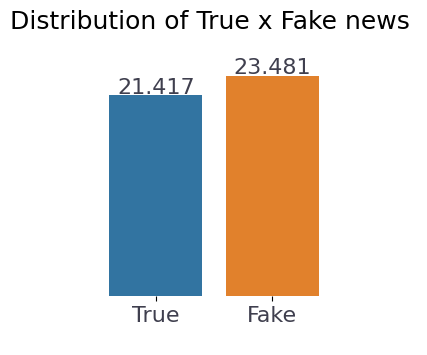

In [ ]:
# Distribution of True x Fake news
f, ax = plt.subplots(figsize=(3,3))

sns.countplot(data = df, x = 'target', ax=ax)

plt.title('Distribution of True x Fake news \n', fontsize=18)
ax.set_xticklabels(['True', 'Fake'], fontsize=16, color='#3f3f4e')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')

# Show number on top of the bar
for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 200,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')

plt.show()

In [ ]:
# Percentange of increased fake news in relation to true news
round((23481 / 21417) * 100, 1)

109.6

There is more fake news than true news in this dataset, so we have a slight imbalance (almost 10% more fake news).

## **Date**

Can the date of the news tell us some information? Let's check it. First, to initiate the analysis, we will need first to convert the `date` feature to `datetime` dtype.

In [ ]:
# Converting date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
# df summary
df_summary = eda.df_info(df)
display_all(df_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
title,object,Categorical,38729,"[As U.S. budget fight looms, Republicans flip ...",0,0.0
text,object,Categorical,38646,[WASHINGTON (Reuters) - The head of a conserva...,0,0.0
subject,object,Categorical,8,"[politicsNews, worldnews, News, politics, Gove...",0,0.0
date,datetime64[ns],DateTime,1010,"[1514678400000000000, 1514505600000000000, 151...",10,0.022273
target,int64,Numerical,2,"[0, 1]",0,0.0


There were some values in `date` that was not in the proper datetime format, so these were converted to missing values (Nan). However, those count for less than 0.03% so let's just drop those nan. 

The index will be reset to assure that we won't have troubles when exploring the concatenated data.

In [ ]:
# Droping 'date' nan
df.dropna(subset='date', inplace = True)

In [ ]:
# Reseting index
df = df.reset_index()

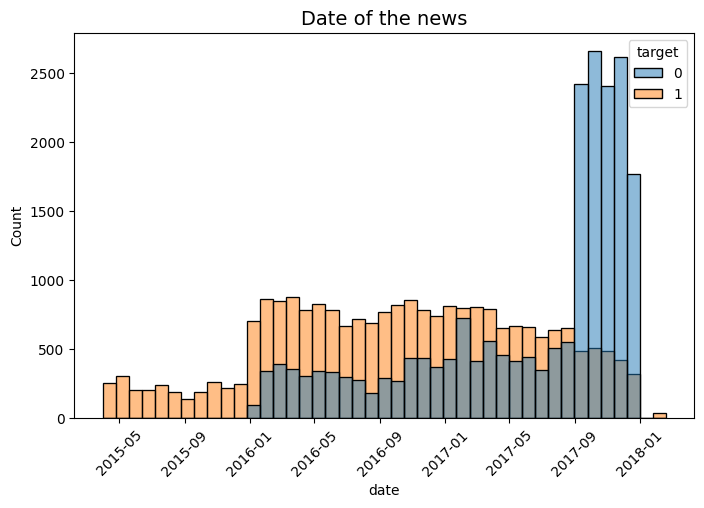

In [ ]:
# 'date' histogram
f, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x='date', hue='target')
ax.set_title('Date of the news', fontsize=14)
plt.xticks(rotation=45)
plt.show()

It is possible to see a **rise in fake news** especially during the election period, from less than 400 to almost 1000 fake news. Starting from January 2016 and only dropping after September 2017. When this drop happens, a rise of true news is followed, hitting more than 2500 true news instead of less than 1000 (average).

## Text length 


Does the number of words have any correlation if the news is true or fake? Let's investigate this by creating a new feature called `text_length` and check its distribution.

In [ ]:
# Create a new column 'text_length' with the length of 'text'
df['text_length'] = df['text'].apply(len)

# Print the updated DataFrame
df.head()

,index,title,text,subject,date,target,text_length
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0,4659
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0,4077
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0,2789
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0,2461
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0,5204


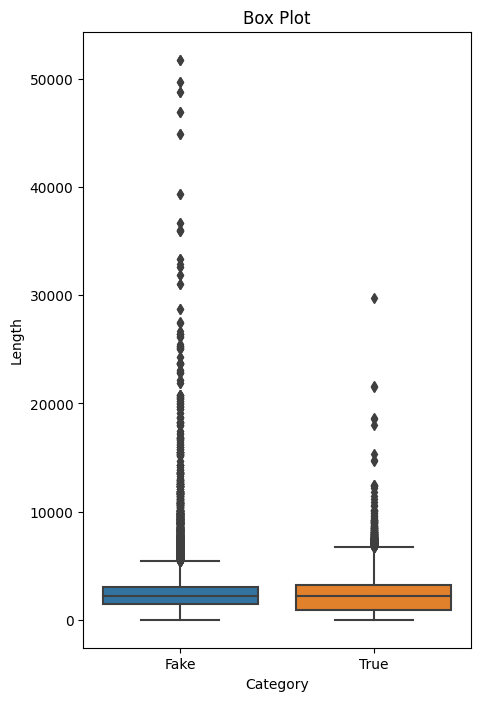

In [ ]:
# Filtering true and fake dataframes
fake_df = df[df['target'] == 1]
true_df = df[df['target'] == 0]

# Create a DataFrame with the lengths
data = pd.DataFrame({'Fake': fake_df['text_length'], 'True': true_df['text_length']})

# Create the box plot
plt.figure(figsize=(5, 8))
sns.boxplot(data=data)

# Set the title and labels
plt.title('Box Plot')
plt.xlabel('Category')
plt.ylabel('Length')

# Show the plot
plt.show()

The chart out that fake news tends to have a higher number of words than a true news. However, it's not clear enough to make this a rule as both boxplots have the 3rd quartile and 1st quartile similar, and there are many outliers in the fake set.

# **Data Cleaning**

In order to execute a great NLP analysis most of the time we need to clean the data. This is done to improve the accuracy of the algorithm and reduce its chances of error. The cleaning text function for NLP analysis below (`denoise_text`) was build with the help of ChatGPT and tested by trial and error. This function can:

* Convert text to lowercase
* Remove HTML tags
* Remove URLs
* Remove square brackets and everything between them
* Remove punctuation marks including quotes
* Tokenize the text into words
* Remove stop words and perform lemmatization
* Join the cleaned words back into a single string

In [ ]:
# Copy of original dataframe
df1 = df.copy()

`df1` will be the copy of the original dataframe `df`. All the changes will be done in this dataframe 

In [ ]:
#@ Denoise Function
stop_words = set(stopwords.words('english'))

def denoise_text(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove square brackets and everything between them
    text = re.sub('\[[^]]*\]', '', text)

    # Remove punctuation marks including quotes
    translator = str.maketrans('', '', string.punctuation + '“”‘’')
    text = text.translate(translator)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stop words and perform lemmatization
    cleaned_words = []
    lemmatizer = WordNetLemmatizer()
    for word in words:
        if word not in stop_words:
            cleaned_word = lemmatizer.lemmatize(word, pos='v') # perform lemmatization on verbs
            cleaned_word = lemmatizer.lemmatize(cleaned_word, pos='n') # perform lemmatization on nouns
            cleaned_words.append(cleaned_word)

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Fake%20News%20Classifier/images/fnews.jpg?raw=true" width="60%"></p>
<p align=center> source: Freepik

# **Text cleaning**

Converting all words to lowercase will cause the model to give all words the same weight. Less usefull characthers (like punctuation, extra spaces, URl/HTML tags) and stopwords are removed without losses. 

Stopwords:
Consider, the words "the", "and", "a", "have"; these words usually don't add much information in sentences and most of the time their removal don't affect the meaning of the text, these one are called stop words.

For instance, you can still read the sentence below if the stop words (in italic) were removed:

- *The* yellow cat jumped *really* high


-  **yellow cat jumped**  **high**

In [ ]:
# initial time
start_time = timeit.default_timer()

# Applying cleaning text function in df1['text']
df1['text'] = df1['text'].apply(denoise_text)

# final time
elapsed_time = timeit.default_timer() - start_time
print("The text was cleaned in: {:.2f} minutes".format(elapsed_time/60))

The text was cleaned in: 2.44 minutes


Now the text is cleaned. Let's do some analysis and hopefully extract insights.

In [ ]:
# Extracts words
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

# Print first five elements
corpus = get_corpus(df1.text)
corpus[:5]

['washington', 'reuters', 'head', 'conservative', 'republican']

The function above (`get_corpus`) works by extracting the words from the text feature and return the first five elements of the resulting corpus list

In [ ]:
# Counting more frequent words
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'say': 166507,
 'trump': 127985,
 'u': 63396,
 'state': 60276,
 'would': 54929,
 'president': 53038,
 'people': 41321,
 'republican': 38098,
 'make': 38047,
 'one': 36731}

Similar to pandas `value_counts`, the `Counter` function tells us which words appear more frequently. Let's remember that we used the Lemmatizer, which means certain words like "said" will turn to its basic lemma, in this case: "say". We can see a "u" as one of the predominant words, which probably was the "US" or "U.S", meaning United States.

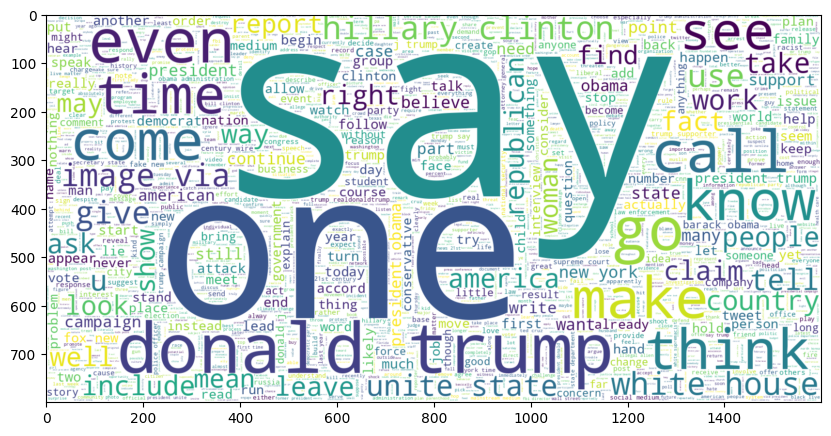

In [ ]:
# WordCloud
plt.figure(figsize=(10,10))
wc_fake = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS, background_color ='white').generate(''. join(df1[df1.target == 1].text))
plt.imshow(wc_fake , interpolation = 'bilinear')
plt.show()

The result of the wordcloud highlights the main words that we saw previously, like 'say', 'one', and, 'donald trump'.

In [ ]:
# N-grams function

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# **N-gram analysis**

N-grams is a sequence of items from a given sample of text or speech. In other words, is a collection of n successive items in a text document. Their sizes (n) can vary - unigrams (1), bigrams (2), trigrams (3), and so fourth.

To make it clear, let's consider a phrase:

- To be or not to be

would turn in to:

- 1-gram = to, be, or, not, ...

- 2-gram = to be, or not, not to, ...

- 3-gram = to be or, or not to, ...

---

The `Sklearn CountVectorizer` can be used to turn the words into a matrix of tokens which can be included in the `get_top_text_ngrams` function returns a list of tuples containing the top n-grams in the corpus in a n-gram range.



And then we can use it to visualize the word's frequency by plotting.

In [ ]:
# Most common words
most_common_uni = get_top_text_ngrams(df1.text,10,1)
most_common_uni = dict(most_common_uni)

Putting a range of 1 in the previous function with show us the most common unique words (`most_common_uni`) 

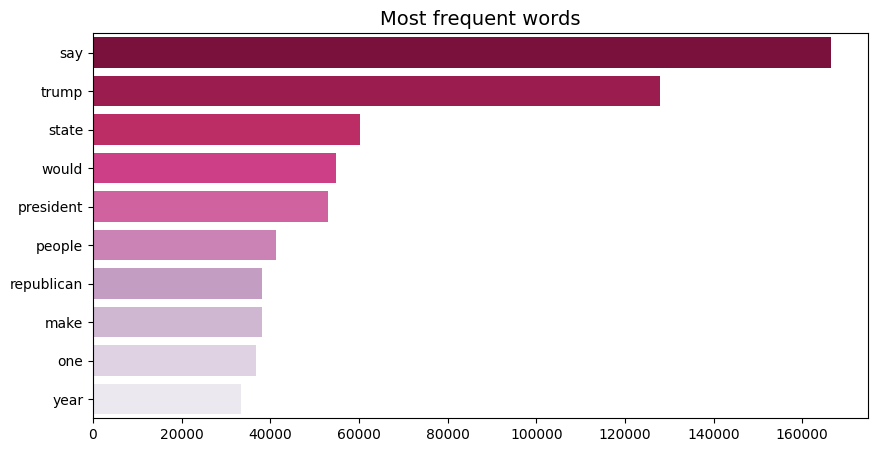

In [ ]:
# Ploting most common unique words
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()), palette='PuRd_r')
ax.set_title('Most frequent words', fontsize=14)
plt.show()

The most frequent words were about politics especially "say", "trump", and others less frequent: "state", "would" and "president".

Now let's do the same but using trigrams (three words) instead.

In [ ]:
# Most trigrams (three words) common
most_common_tri = get_top_text_ngrams(df1.text,10,3)
most_common_tri = dict(most_common_tri)

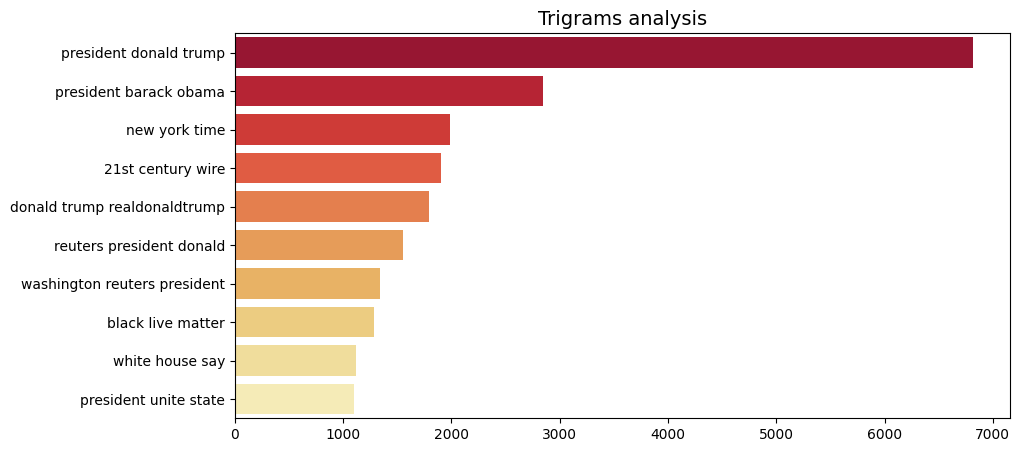

In [ ]:
# Ploting trigrams
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()), palette='YlOrRd_r')
ax.set_title('Trigrams analysis', fontsize=14)
plt.show()

In the trigram analysis, both candidates Obama and Trump were very cited.

But if we didn't had cleaned the text? What the n-grams would look like? Let's check.

In [ ]:
# Most trigrams (three words) common
most_common_tri_raw = get_top_text_ngrams(df.text,10,3)
most_common_tri_raw = dict(most_common_tri_raw)

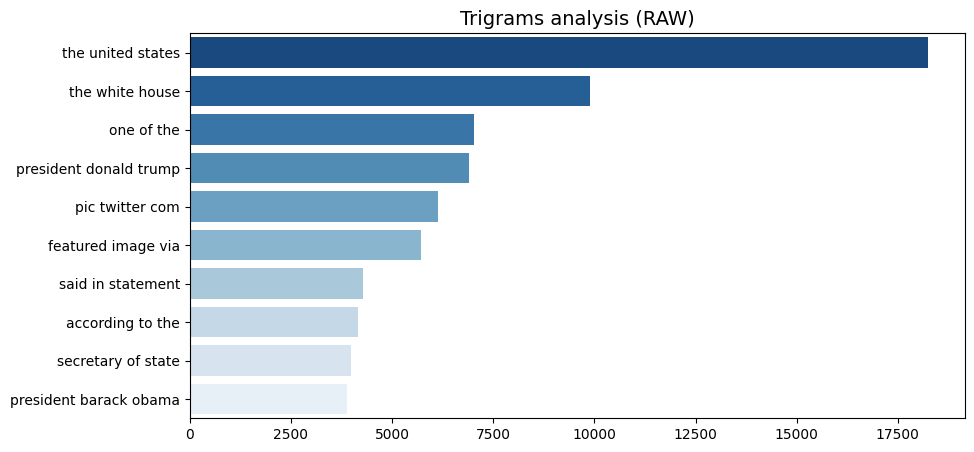

In [ ]:
# Ploting trigrams
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(x=list(most_common_tri_raw.values()),y=list(most_common_tri_raw.keys()),  palette='Blues_r')
ax.set_title('Trigrams analysis (RAW)', fontsize=14)
plt.show()

Can you the diference? Without a proper cleaning the analysis loses quality because it will get things with no importance, like conective setences like "one of the" or "according to the"

# **Model development**

As usual, let's split the dataframe between feature (`X`) and target (`y`). The maximum number of words (`num_words`) and the maximum length (`maxlen`) will be set as well. `Stratify` and `Shuffle` are used to make sure that the sets are evenly split and shuffled.

In [ ]:
# Splitting dataset
X = df1.text
y = df1.target

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y, shuffle=True)

In [ ]:
# maximum number of words
num_words = 10000

# maximum length
maxlen = 300

Before going directly to the model development, when dealing with text, it is necessary to preprocess the data before. Usually in an NLP analysis, we use the 
Keras `Tokenizer` and `pad_sequences`.

First, `Tokenizer` will transform the words into a list of numbers (or tokens, or sequences), and then `pad_sequences` pad the sequences to the same length. 

To make it easier to understand, let's think about two phrases: 

- I love coffee
- I love coffee with milk

The first phrase has 3 parts, so it would be a sequence like this: 

[2, 3, 4]

However, the second one has 5 parts, yielding a sequence like this: 

[2, 3, 4, 5, 6]

and this shape is not accepted by the algorithm. Remember that we dealing with neural networks we need to feed them with vectorized data with the same shape.

So, `pad_sequences` fills the first sequence with 0 to equal the length of the second sequence. As we are not giving further arguments, this function adds zeros in the beginning, returning a sequence like this: [0, 0, 2, 3, 4], this is called pre-padding. On the other hand, if we choose to post padding, the zeros would be in the final part of the sequence.

In [ ]:
# Tokenizing train set
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)

# Padding train set
x_train = pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
# Tokenizing test set
tokenized_test = tokenizer.texts_to_sequences(x_test)

# Padding test set
x_test = pad_sequences(tokenized_test, maxlen=maxlen)

Now both `x_train` and `x_test` are tokenized and padded, let's move forward to build the deep learning layers model.

In [ ]:
# Model development
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=(150), input_length=maxlen),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model compile
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 150)          1500000   
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 16)           12016     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,512,033
Trainable params: 1,512,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting model
history = model.fit(x_train, y_train, verbose = 2, epochs = 3, 
                    validation_data = (x_test, y_test), 
                    callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6, verbose=1)])

Epoch 1/3
1053/1053 - 68s - loss: 0.0827 - accuracy: 0.9781 - val_loss: 0.0198 - val_accuracy: 0.9939 - 68s/epoch - 65ms/step
Epoch 2/3
1053/1053 - 54s - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0126 - val_accuracy: 0.9956 - 54s/epoch - 52ms/step
Epoch 3/3
1053/1053 - 57s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0114 - val_accuracy: 0.9964 - 57s/epoch - 54ms/step


We got an accuracy of almost 100% and loss very close to 0%. Still, let's continue investigating. 

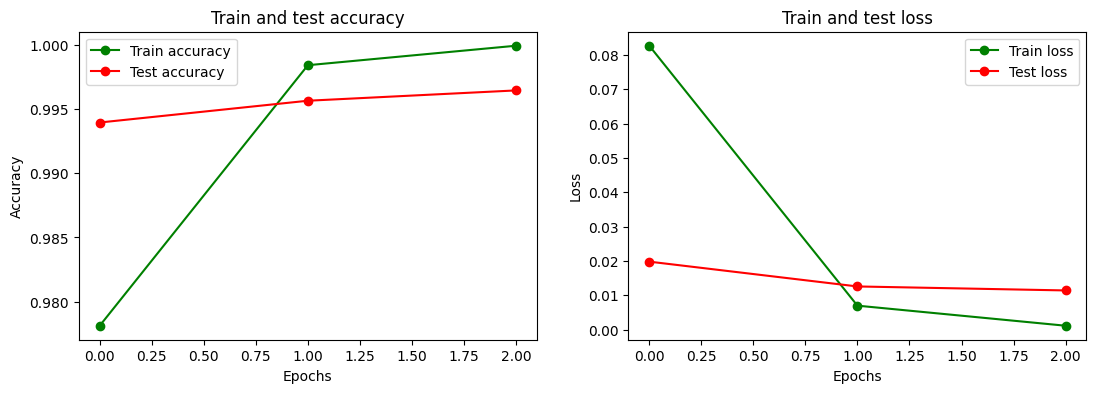

In [ ]:
# Ploting results
epochs = [i for i in range(3)]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13,4)

train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]


ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

The charts restate our previous results: great accuracy and extremely low loss.

In [ ]:
# Model Evaluate
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print()
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 10s 9ms/step - loss: 4.6851e-04 - accuracy: 1.0000
Accuracy of the model on Training Data is -  99.99703168869019 %

351/351 [==============================] - 3s 10ms/step - loss: 0.0114 - accuracy: 0.9964
Accuracy of the model on Testing Data is -  99.64355826377869 %


Again, the same, including with both training and test sets. 

In [ ]:
# Making predctions
pred = np.round(model.predict(x_test)) # It's necessary to round results otherwise it's not possible visualize it.

351/351 [==============================] - 3s 9ms/step


In [ ]:
# Classification report
print(classification_report(y_test, pred, target_names = ['True', 'Fake']))

              precision    recall  f1-score   support

        True       1.00      1.00      1.00      5354
        Fake       1.00      1.00      1.00      5868

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



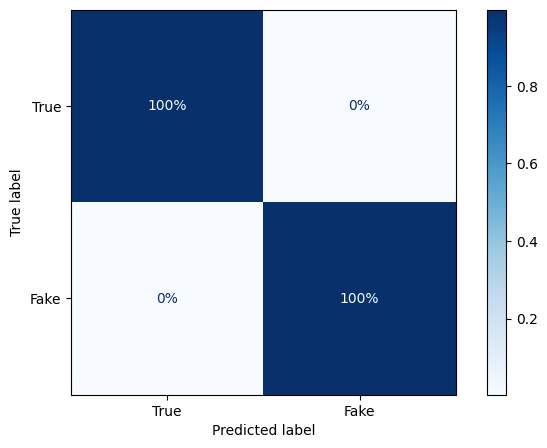

In [ ]:
# Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap = 'Blues',
                                        display_labels=('True', 'Fake'),
                                        ax=ax, normalize ='true', values_format= '.0%');



Accordingly to all results, including the classification report and the confusion matrix, this neural network was able to detect with great precision and low loss all the results and was also capable of classifying both correctly.

# **Results Summary**

* A target feature was created
* As both datasets were isolated, we joined them together
* There was a slight imbalance, but the model was able to handle it without any problems
* The date feature was converted to its proper dtype and its missing values were removed

---

* `date` chart points out that fake News tends to increase in election periods
* `text` was cleaned and the most common words were about politics, especially about candidates
* `text_length` show that fake news tends to have a larger length than true text
* The model developed achieved great results, with accuracy close to 100% and a loss of almost 0%, for both training and test sets.

We saw that fake news tends to rise mainly during election periods, and the main subjects were the candidates. With this insight in mind and with a powerful deep learning model, we can predict which news is more likely to be fake.

# **Discussion**

Warning! Though the neural network can predict with great accuracy which news is fake or not, still, there are some issues. 

First, the world changes rapidly, and although this model predicts very well, most of the training dataset subject is about politics. With that in mind, we cannot trust the model to predict every piece of news, for example, news that vaccines can cause autism (which is totally fake).
Hence, more training data must be necessary when investing in other matters.

Second, the context must be seen. Let's suppose that you published that candidate "X" is a terrible bandit, however, in a sarcastic tone. How the algorithm is going to know exactly the tone of your speech? That is why we can 100% commit the model to answer everything, instead, a team focused on dealing with fake news should have the help of a model and in this way, help them to come to a decision.

Lastly, the best way of dealing with the news that claims alarming news or outrageous headlines is always checking. What to check? Here is a list from the [International Federation of Library Associations and Institutions (IFLA)](https://repository.ifla.org/handle/123456789/167):

- Investigate the site
- Check the author
- Check the date
- Read beyond
- Is there any supporting sources/references
- Check your own biases/believes
- Ask the experts

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Fake%20News%20Classifier/images/sign.jpg?raw=true" width="60%"></p>
<p align=center> source: Freepik

# **Conclusion**

A robust and accurate algorithm for NLP was developed using neural networks. This project can be used allied with other technologies with the aiming of preventing the spread of fake news. For example, labeling a post or article that has fake news.




## References

Some ideas of this work was inspired in the Kaggle codes of [Josué Nascimento](https://www.kaggle.com/code/josutk/only-one-word-99-2) and [Madhav Mathur](https://www.kaggle.com/code/madz2000/nlp-using-glove-embeddings-99-87-accuracy)

Images:

<a href="https://www.freepik.com/free-vector/false-information-broadcasting-press-newspaper-journalists-editors-fake-news-junk-news-content-disinformation-media-concept-illustration_11669710.htm#query=fake%20news&position=4&from_view=search&track=ais">Image by vectorjuice</a> on Freepik

<a href="https://www.freepik.com/free-vector/flat-girl-with-magnifying-glass-research-fake-news-spreads_22777077.htm#query=fake%20news&position=6&from_view=search&track=ais">Image by redgreystock</a> on Freepik

<a href="https://www.freepik.com/free-vector/infodemic-news-illustration_10806608.htm#query=fake%20news&position=2&from_view=search&track=ais">Image by pikisuperstar</a> on Freepik

